In [119]:
import pandas as pd

In [120]:
results = pd.read_csv('results.csv')

In [121]:
results['minority_size'].value_counts()

5.0     90
40.0    90
30.0    90
20.0    90
2.0     90
10.0    90
0.5     90
1.0     90
50.0    69
Name: minority_size, dtype: int64

In [122]:
results.columns

Index(['minority_size', 'strategy', 'threshold', 'tp', 'fp', 'tn', 'fn', 'tpr',
       'tnr', 'roc_auc', 'geometric_mean', 'arithmetic_mean', 'f1_score',
       'precision'],
      dtype='object')

In [123]:
data = results.loc[results['strategy'].isin(['optimal', 'theoretical'])]

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn']

In [126]:
plt.style.use(['ggplot', 'seaborn-poster'])

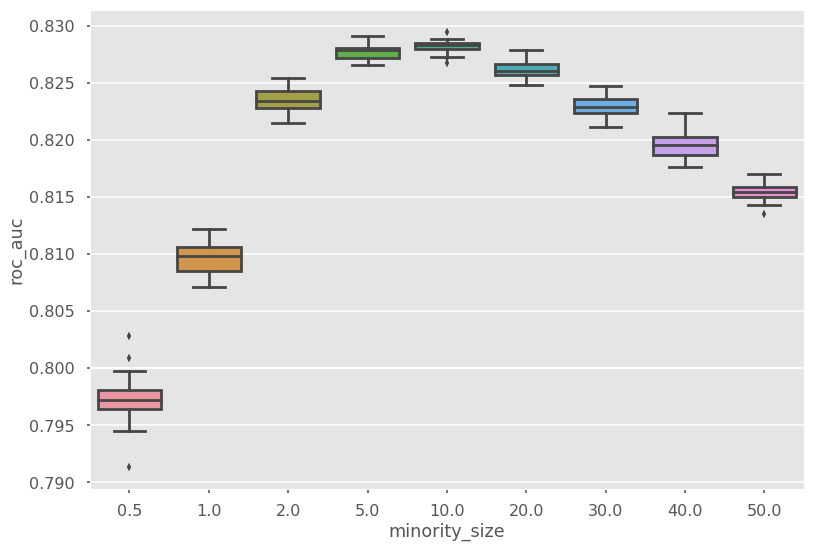

In [127]:
sns.boxplot(x='minority_size', y='roc_auc', data=data)

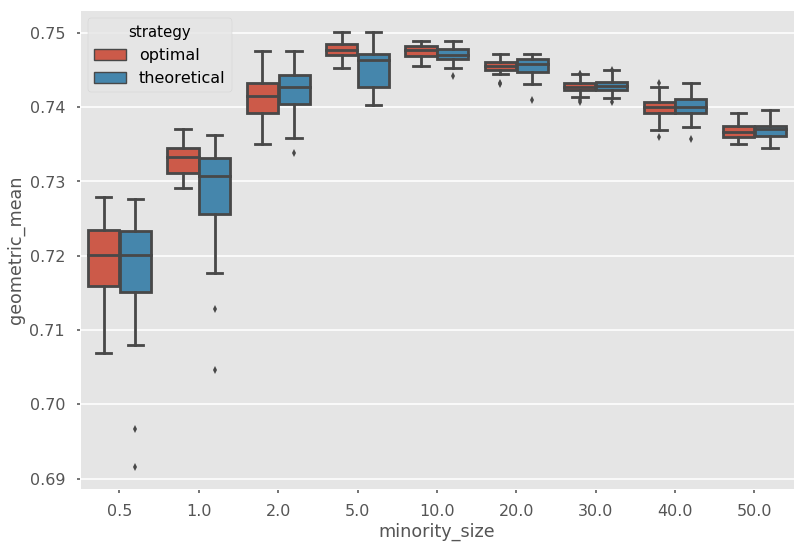

In [128]:
sns.boxplot(x='minority_size', y='geometric_mean', hue='strategy', data=data)

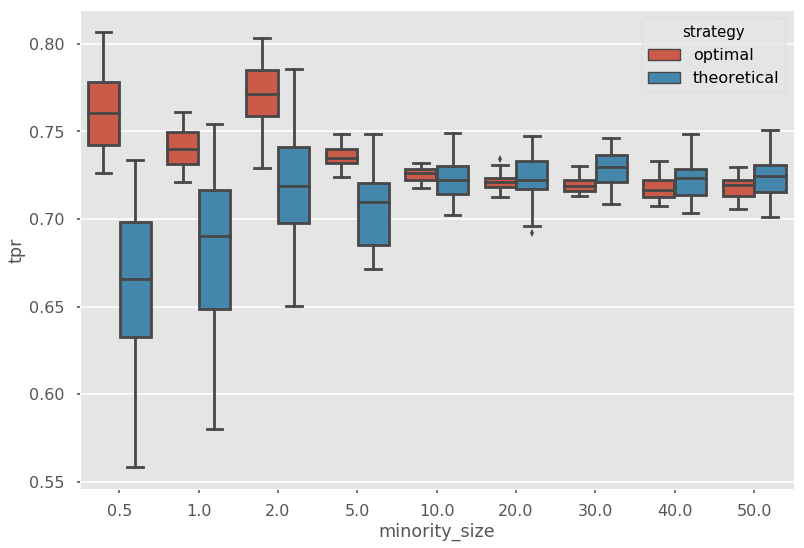

In [129]:
sns.boxplot(x='minority_size', y='tpr', hue='strategy', data=data)

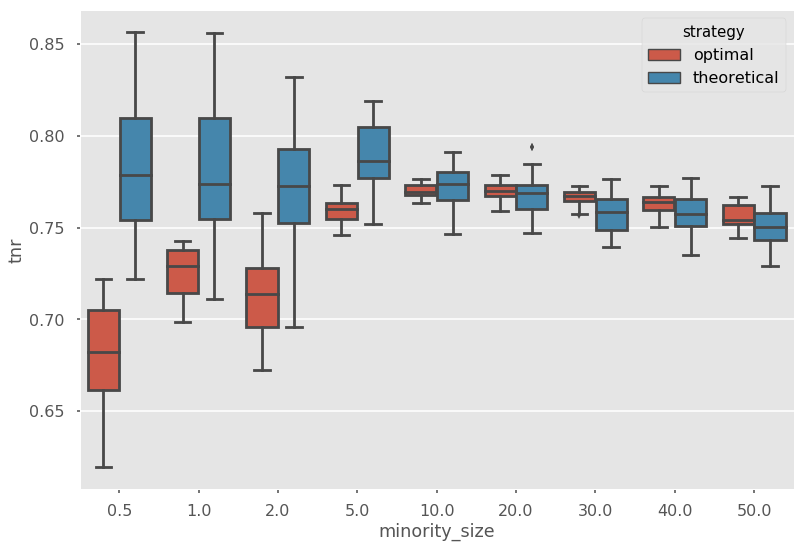

In [130]:
sns.boxplot(x='minority_size', y='tnr', hue='strategy', data=data)

In [131]:
data['minority_size_label'] = data['minority_size'].astype(str)

/var/web_services/galaxy/jupyter_conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
data.head()

,minority_size,strategy,threshold,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision,minority_size_label
0,1.0,optimal,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920,1.0
1,1.0,theoretical,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920,1.0
3,0.5,optimal,0.003,11386,215285,469698,3631,0.758207,0.685708,0.797226,0.721047,0.721957,0.094221,0.050231,0.5
4,0.5,theoretical,0.005,9064,116142,568841,5953,0.603583,0.830445,0.797226,0.707985,0.717014,0.129280,0.072393,0.5
6,0.5,optimal,0.004,11131,201930,483053,3886,0.741227,0.705204,0.797187,0.722991,0.723215,0.097607,0.052243,0.5


In [133]:
agged = data.groupby(['minority_size', 'strategy']).mean()

In [134]:
agged.reset_index(inplace=True)

In [135]:
agged

,minority_size,strategy,threshold,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision
0,0.5,optimal,0.003533,11438.900000,218731.566667,466251.433333,3578.100000,0.761730,0.680676,0.797315,0.719633,0.721203,0.093680,0.049931
1,0.5,theoretical,0.005000,9928.400000,148903.266667,536079.733333,5088.600000,0.661144,0.782618,0.797315,0.718196,0.721881,0.115645,0.063525
2,1.0,optimal,0.008367,11112.333333,187390.600000,497592.400000,3904.666667,0.739984,0.726430,0.809675,0.733076,0.733207,0.104209,0.056059
3,1.0,theoretical,0.010000,10267.100000,151582.700000,533400.300000,4749.900000,0.683699,0.778706,0.809675,0.728495,0.731202,0.117672,0.064543
4,2.0,optimal,0.016667,11554.133333,195490.600000,489492.400000,3462.866667,0.769404,0.714605,0.823512,0.741175,0.742004,0.104460,0.056060
5,2.0,theoretical,0.020000,10814.633333,159641.166667,525341.833333,4202.366667,0.720159,0.766941,0.823512,0.742385,0.743550,0.117859,0.064286
6,5.0,optimal,0.044000,11054.333333,164661.566667,520321.433333,3962.666667,0.736121,0.759612,0.827753,0.747745,0.747867,0.115960,0.062941
7,5.0,theoretical,0.050000,10578.366667,144499.833333,540483.166667,4438.633333,0.704426,0.789046,0.827753,0.745263,0.746736,0.124839,0.068533
8,10.0,optimal,0.099167,10893.266667,157296.833333,527686.166667,4123.733333,0.725396,0.770364,0.828225,0.747533,0.747880,0.118934,0.064779
9,10.0,theoretical,0.100000,10853.900000,155852.600000,529130.400000,4163.100000,0.722774,0.772472,0.828225,0.747129,0.747623,0.119584,0.065196


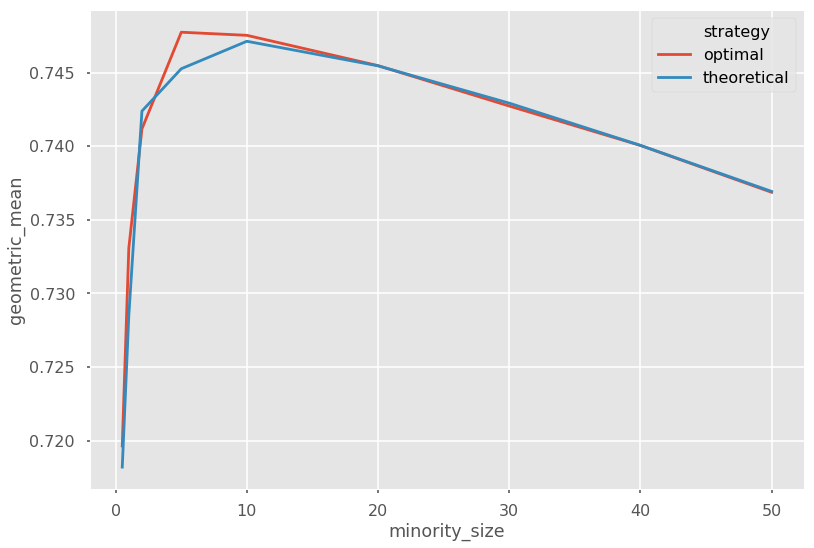

In [136]:
sns.lineplot(data=agged, x='minority_size', y='geometric_mean', hue='strategy', estimator=None)

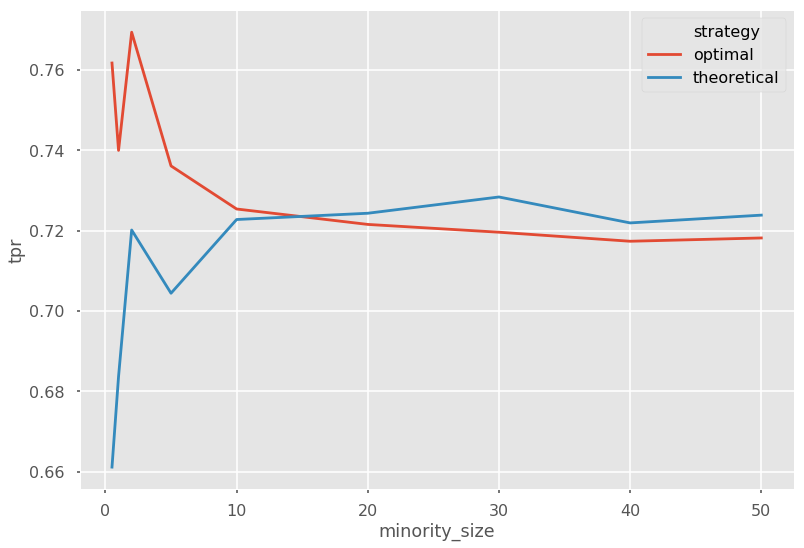

In [137]:
sns.lineplot(data=agged, x='minority_size', y='tpr', hue='strategy', estimator=None)

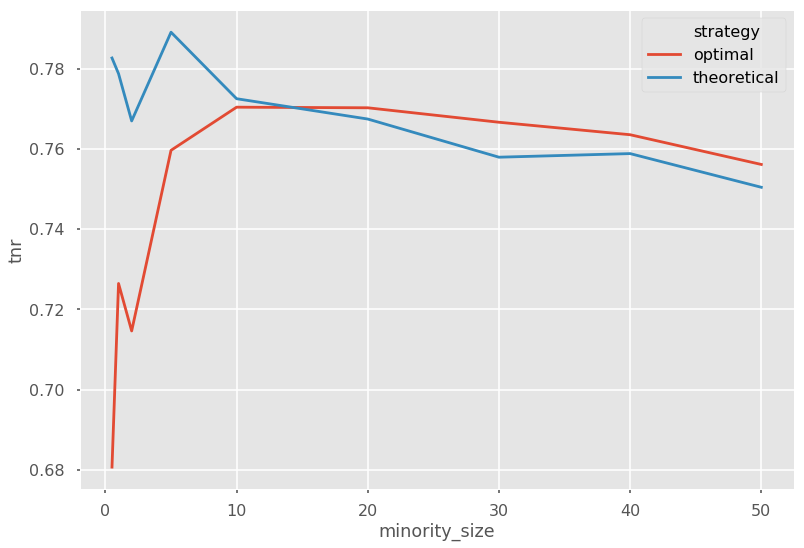

In [138]:
sns.lineplot(data=agged, x='minority_size', y='tnr', hue='strategy', estimator=None)

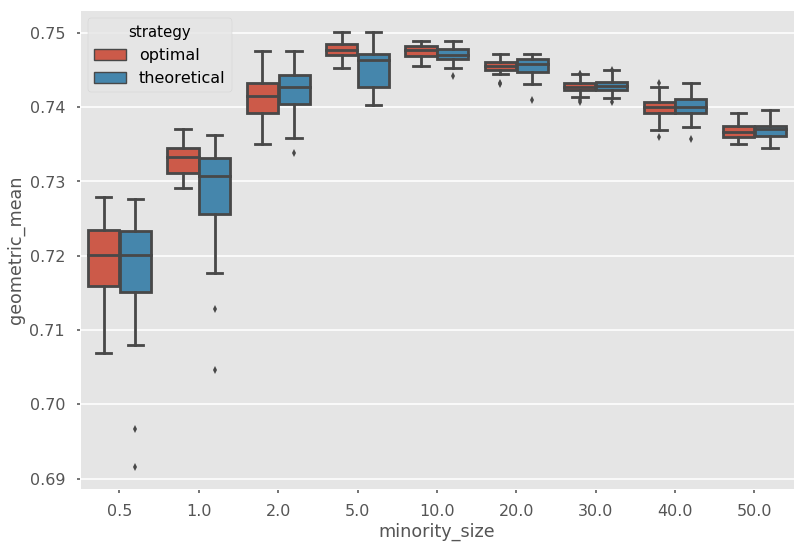

In [139]:
sns.boxplot(data=data, x='minority_size', y='geometric_mean', hue='strategy')

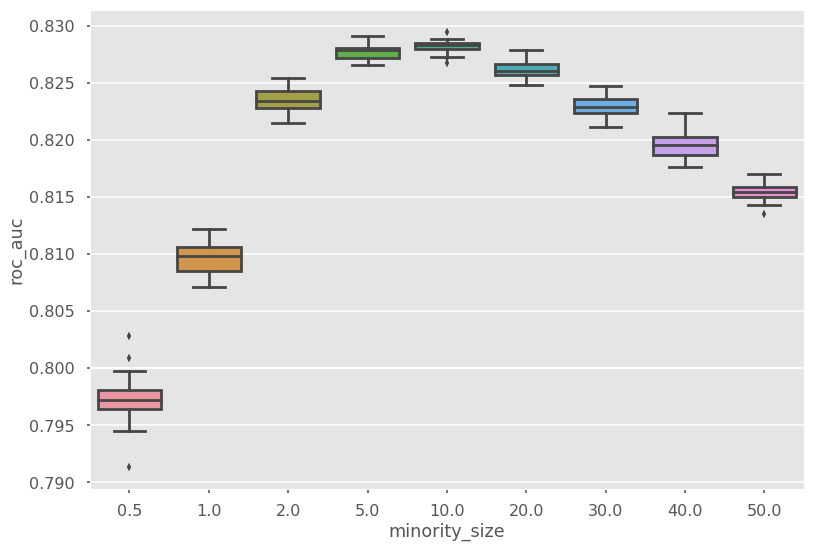

In [140]:
sns.boxplot(data=data, x='minority_size', y='roc_auc')

In [144]:
agged

,minority_size,strategy,threshold,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision
0,0.5,optimal,0.003533,11438.900000,218731.566667,466251.433333,3578.100000,0.761730,0.680676,0.797315,0.719633,0.721203,0.093680,0.049931
1,0.5,theoretical,0.005000,9928.400000,148903.266667,536079.733333,5088.600000,0.661144,0.782618,0.797315,0.718196,0.721881,0.115645,0.063525
2,1.0,optimal,0.008367,11112.333333,187390.600000,497592.400000,3904.666667,0.739984,0.726430,0.809675,0.733076,0.733207,0.104209,0.056059
3,1.0,theoretical,0.010000,10267.100000,151582.700000,533400.300000,4749.900000,0.683699,0.778706,0.809675,0.728495,0.731202,0.117672,0.064543
4,2.0,optimal,0.016667,11554.133333,195490.600000,489492.400000,3462.866667,0.769404,0.714605,0.823512,0.741175,0.742004,0.104460,0.056060
5,2.0,theoretical,0.020000,10814.633333,159641.166667,525341.833333,4202.366667,0.720159,0.766941,0.823512,0.742385,0.743550,0.117859,0.064286
6,5.0,optimal,0.044000,11054.333333,164661.566667,520321.433333,3962.666667,0.736121,0.759612,0.827753,0.747745,0.747867,0.115960,0.062941
7,5.0,theoretical,0.050000,10578.366667,144499.833333,540483.166667,4438.633333,0.704426,0.789046,0.827753,0.745263,0.746736,0.124839,0.068533
8,10.0,optimal,0.099167,10893.266667,157296.833333,527686.166667,4123.733333,0.725396,0.770364,0.828225,0.747533,0.747880,0.118934,0.064779
9,10.0,theoretical,0.100000,10853.900000,155852.600000,529130.400000,4163.100000,0.722774,0.772472,0.828225,0.747129,0.747623,0.119584,0.065196


In [153]:
results

,minority_size,strategy,threshold,tp,fp,tn,fn,tpr,tnr,roc_auc,geometric_mean,arithmetic_mean,f1_score,precision
0,1.0,optimal,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920
1,1.0,theoretical,0.010,11256,193696,491287,3761,0.749551,0.717225,0.809787,0.733210,0.733388,0.102342,0.054920
2,1.0,default,0.500,0,0,684983,15017,0.000000,1.000000,0.809787,0.000000,0.500000,0.000000,0.000000
3,0.5,optimal,0.003,11386,215285,469698,3631,0.758207,0.685708,0.797226,0.721047,0.721957,0.094221,0.050231
4,0.5,theoretical,0.005,9064,116142,568841,5953,0.603583,0.830445,0.797226,0.707985,0.717014,0.129280,0.072393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,50.0,theoretical,0.500,10569,159879,525104,4448,0.703802,0.766594,0.814331,0.734528,0.735198,0.113973,0.062007
785,50.0,default,0.500,10569,159879,525104,4448,0.703802,0.766594,0.814331,0.734528,0.735198,0.113973,0.062007
786,50.0,optimal,0.510,10706,165551,519432,4311,0.712925,0.758314,0.814863,0.735269,0.735620,0.111944,0.060741
787,50.0,theoretical,0.500,10827,170684,514299,4190,0.720983,0.750820,0.814863,0.735750,0.735901,0.110183,0.059649


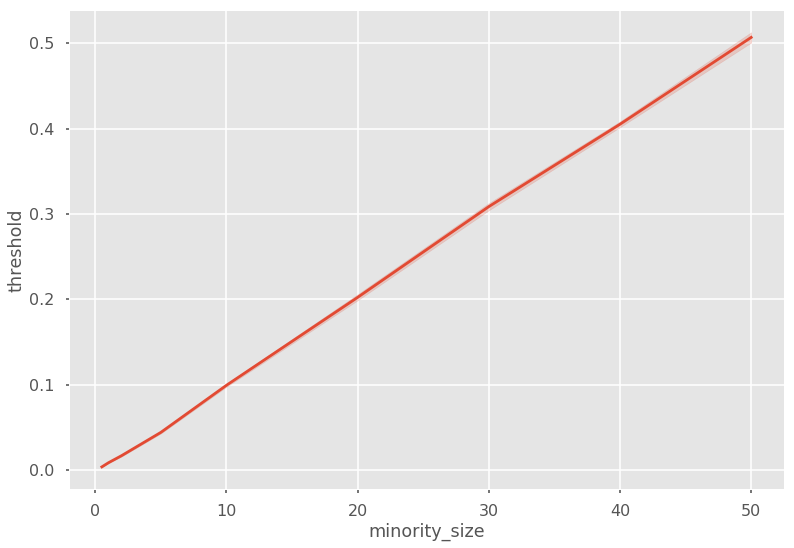

In [152]:
optimal_thresholds = results.loc[results['strategy'] == 'optimal']
ax = sns.lineplot(x="minority_size", y="threshold", data=optimal_thresholds)